<a href="https://colab.research.google.com/github/duartegonzaloariel/Analitica-Tradicional/blob/main/Tarea_3_Distribucion_Binomial_a_Nomal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

#**Carga de Datos**

importar Datos

In [ ]:
df1 = pd.read_excel('/content/sample_data/Tarea 3_binomial50P.xlsx')
df2 = pd.read_excel('/content/sample_data/Tarea 3_binomial2000P.xlsx')

#**Operaciones**

Base de Datos de 50 paquetes

In [ ]:
df1.shape

(50, 2)

In [ ]:
df1.head()

,paquete,dañado
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
df1.describe()

,paquete,dañado
count,50.00000,50.000000
mean,25.50000,0.020000
std,14.57738,0.141421
min,1.00000,0.000000
25%,13.25000,0.000000
50%,25.50000,0.000000
75%,37.75000,0.000000
max,50.00000,1.000000


In [ ]:
# Contar el número total de paquetes dañados
total_damaged = df1['dañado'].sum()

# Contar el número total de paquetes
total_packages = len(df1)

# Calcular el porcentaje de paquetes dañados
P1 = (total_damaged / total_packages) * 100

print(f"Porcentaje de paquetes dañados: {P1:.2f}%")


Porcentaje de paquetes dañados: 2.00%


Base de Datos de 2000 paquetes

In [ ]:
df2.shape

(2000, 2)

In [ ]:
df2.head()

,paquete,dañado
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
df2.describe()

,paquete,dañado
count,2000.000000,2000.000000
mean,1000.500000,0.020000
std,577.494589,0.140035
min,1.000000,0.000000
25%,500.750000,0.000000
50%,1000.500000,0.000000
75%,1500.250000,0.000000
max,2000.000000,1.000000


In [ ]:
# Contar el número total de paquetes dañados
total_damaged = df2['dañado'].sum()

# Contar el número total de paquetes
total_packages = len(df2)

# Calcular el porcentaje de paquetes dañados
P2 = (total_damaged / total_packages) * 100

print(f"Porcentaje de paquetes dañados: {P2:.2f}%")

Porcentaje de paquetes dañados: 2.00%


#**Graficos**

In [ ]:
p1=P1/100
p2=P2/100

# Datos del problema
n1 = len(df1)    # Tamaño del lote para a) y b)
n2 = len(df2)   # Tamaño del lote para c) y d)

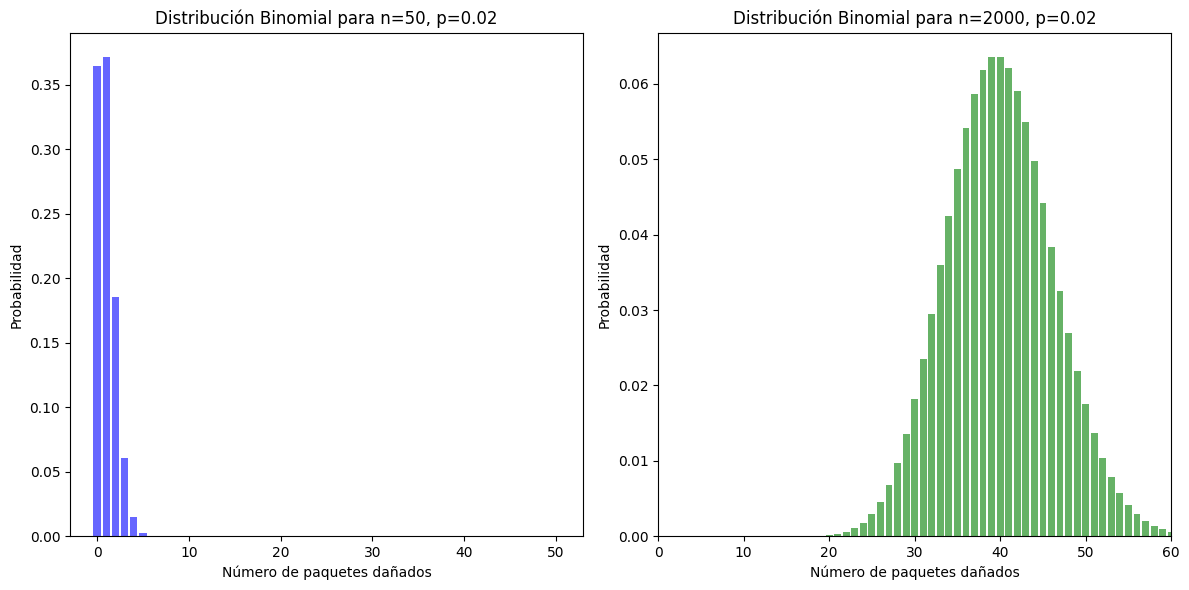

In [ ]:
# Valores de k (número de paquetes dañados) para las distribuciones
k1_values = np.arange(0, n1 + 1)
k2_values = np.arange(0, n2 + 1)

# Distribuciones binomiales para n1 y n2
binom_n1 = stats.binom.pmf(k1_values, n1, p1)
binom_n2 = stats.binom.pmf(k2_values, n2, p2)

# Gráfico de la distribución binomial para n1 = 50
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(k1_values, binom_n1, color='blue', alpha=0.6)
plt.title(f'Distribución Binomial para n={n1}, p={p1}')
plt.xlabel('Número de paquetes dañados')
plt.ylabel('Probabilidad')

# Gráfico de la distribución binomial para n2 = 2000
plt.subplot(1, 2, 2)
plt.bar(k2_values, binom_n2, color='green', alpha=0.6)
plt.xlim(0, 60)  # Limitar el rango en el eje x para visualizar mejor
plt.title(f'Distribución Binomial para n={n2}, p={p2}')
plt.xlabel('Número de paquetes dañados')
plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()

# **Pruebas**

In [ ]:
# a) Probabilidad de que exactamente 2 envíos lleguen dañados en un lote de 50
k1 = 2
prob_a = stats.binom.pmf(k1, n1, p1)
print(f"a) Probabilidad de que exactamente 2 envíos estén dañados en un lote de {n1}: {prob_a:.4f}\n")

# b) Probabilidad de que 2 o más envíos lleguen dañados en un lote de 50
prob_b = 1 - stats.binom.cdf(k1 - 1, n1, p1)
print(f"b) Probabilidad de que 2 o más envíos estén dañados en un lote de {n1}: {prob_b:.4f}\n")


# c) Aproximación con la distribución normal para 2000 paquetes y 30 defectuosos
k2 = 30
mu = n2 * p2                # Media
sigma = np.sqrt(n2 * p2 * (1 - p2))  # Desviación estándar

print(f"c) Usando la aproximación normal, mu es: {mu}  y sigma es: {sigma} ")

# Aproximación normal: usando P(29.5 < X < 30.5) para "exactamente 30"
prob_c = stats.norm.cdf(k2 + 0.5, mu, sigma) - stats.norm.cdf(k2 - 0.5, mu, sigma)
print(f"   Probabilidad de que exactamente 30 envíos estén dañados en un lote de {n2} usando la aproximación normal: {prob_c:.4f}\n")


# d) Cálculo de la probabilidad exacta usando la distribución binomial sin aproximación
prob_exact = stats.binom.pmf(k2, n2, p2)
print(f"d) Probabilidad de que exactamente {k2} envíos estén dañados en un lote de {n2} SIN USAR la aproximación normal: {prob_exact:.4f}")

a) Probabilidad de que exactamente 2 envíos estén dañados en un lote de 50: 0.1858

b) Probabilidad de que 2 o más envíos estén dañados en un lote de 50: 0.2642

c) Usando la aproximación normal, mu es: 40.0  y sigma es: 6.260990336999411 
   Probabilidad de que exactamente 30 envíos estén dañados en un lote de 2000 usando la aproximación normal: 0.0178

d) Probabilidad de que exactamente 30 envíos estén dañados en un lote de 2000 SIN USAR la aproximación normal: 0.0181
